In [1]:
import json
from matplotlib import pyplot as plt

In [2]:
with open('data/workflows/cs-vqe-test-3yge1-r000_workflow_result.json', 'r') as json_file:
    data = (json.load(json_file))

In [16]:
num_params = len(data["cs-vqe-test-3yge1-r000-4116107011"]['optimization-results']['history'][0]['params']['real'])

In [155]:
params=[]
for op in data['cs-vqe-test-3yge1-r000-3106087141']['ansatz_circuit']['operations']:
    if 'params' in op['gate']:
        param = op['gate']['free_symbols'][0]
        params.append(param)
        params = list(set(params))

param_data = {'calls':[],
              'vals':[],
              'params':params}

for i in data["cs-vqe-test-3yge1-r000-4116107011"]['optimization-results']['history']:
    for index, j in enumerate(i['params']['real']):
        if index not in param_data.keys():
            param_data[index] = [j]
        else:
            param_data[index].append(j)        
            
    param_data['calls'].append(i['call_number'])
    param_data['vals'].append(i['value']['value'])

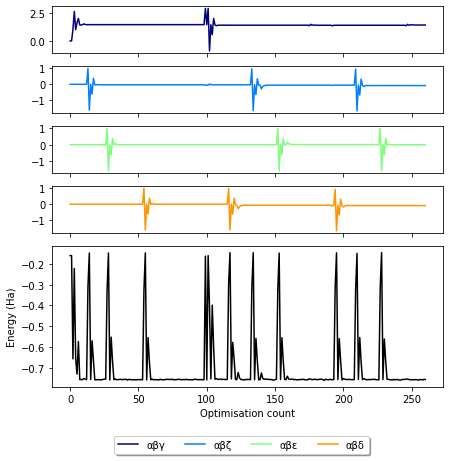

In [161]:
fig, axs = plt.subplots(nrows = num_params+1, ncols = 1,
                        sharex=True,
                        gridspec_kw={'height_ratios': [1 for i in range(num_params)]+[3]},
                        figsize=(7, 7))

#axs[0].set_title('Parameter settings')
for i in range(num_params):
    c = plt.cm.jet(i/(num_params))
    axs[i].plot(param_data['calls'], param_data[i], label=param_data['params'][i], color=c)

#axs[-1].set_title('Optimiser output')
axs[-1].plot(param_data['calls'], param_data['vals'], color='black')
axs[-1].set_xlabel('Optimisation count')
axs[-1].set_ylabel('Energy (Ha)')

fig.legend(loc="lower center",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           ncol=num_params,
           bbox_to_anchor=(0.5, -0.01),
           fancybox=True, 
           shadow=True)

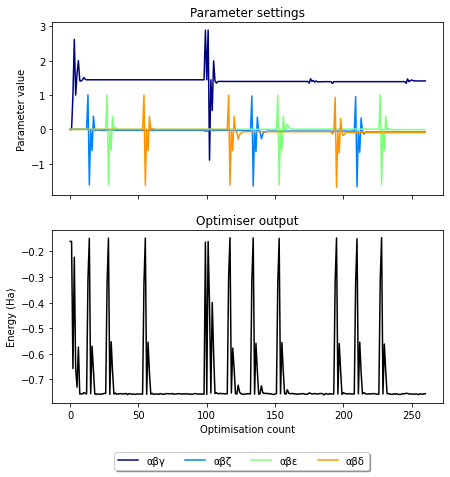

In [162]:
fig, axs = plt.subplots(nrows = 2, ncols = 1,
                        sharex=True,
                        figsize=(7, 7))

axs[0].set_title('Parameter settings')
for i in range(num_params):
    c = plt.cm.jet(i/(num_params))
    axs[0].plot(param_data['calls'], param_data[i], label=param_data['params'][i], color=c)
axs[0].set_ylabel('Parameter value')

axs[1].set_title('Optimiser output')
axs[1].plot(param_data['calls'], param_data['vals'], color='black')
axs[1].set_xlabel('Optimisation count')
axs[1].set_ylabel('Energy (Ha)')

fig.legend(loc="lower center",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           ncol=num_params,
           bbox_to_anchor=(0.5, -0.01),
           fancybox=True, 
           shadow=True)